In [65]:
import numpy as np
import pandas as pd
import os
from scipy import stats
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt

In [62]:
Data_path = r"Y:\Projects\2023_Scholte_FMG1441\Data"
epochs_timewindows = np.load(os.path.join(Data_path, "Epochs_Time_Window.npy"))
max_sub = 15    # Maximum number of participants
min_rep = 5     # Define minimum repetition
ce = []
sc = []
ce_pvalue = []
sc_pvalue = []

In [63]:
for i in range(5, max_sub+1):
    sub_name = "sub_" + str(i)
    sub_data_path = os.path.join(Data_path, sub_name, "Regression", sub_name + "_βcoef(Oz).npy")
    sub_data = np.load(sub_data_path)
    ce.append(list(sub_data[:, 0:min_rep].mean(axis = 1)))
    # ce += list(sub_data[:, 0:min_rep].mean(axis = 1))
    sc.append(list(sub_data[:, min_rep:].mean(axis = 1)))
    print(i)
    # sc += list(sub_data[:, min_rep:].mean(axis = 1))
ce = np.array(ce)
ce.shape
sc = np.array(sc)
sc.shape

5
6
7
8
9
10
11
12
13
14
15


(11, 513)

In [64]:
num_sub = ce.shape[1]
for i in range(0, num_sub):
    t_stat, p_value_ce = ttest_1samp(ce[:, i], popmean = 0)
    t_stat, p_value_sc = ttest_1samp(sc[:, i], popmean = 0)
    ce_pvalue.append(p_value_ce)
    sc_pvalue.append(p_value_sc)

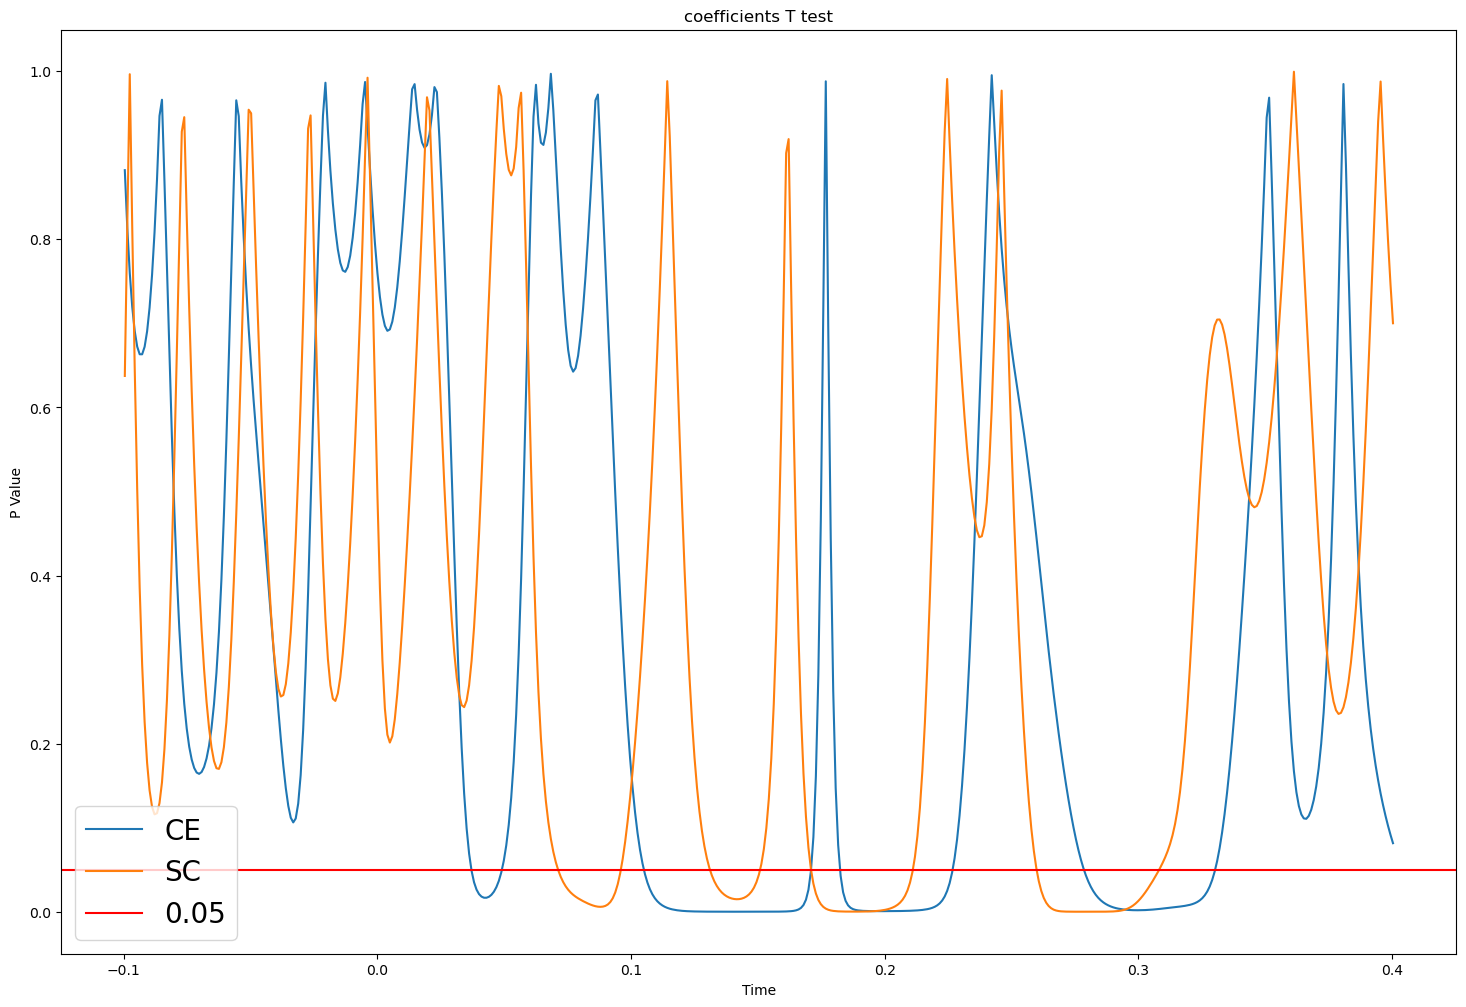

In [70]:
# Set the plot size
plt.rcParams['figure.figsize'] = [18, 12]
plt.figure(1)
plt.plot(epochs_timewindows, ce_pvalue, label = "CE")
plt.plot(epochs_timewindows, sc_pvalue, label = "SC")
plt.axhline(y=0.05, color='r', linestyle='-', label = '0.05')
plt.xlabel('Time')
plt.ylabel('P Value')
plt.title("coefficients T test")
plt.legend(fontsize="20")
plt.savefig(os.path.join(Data_path, "Coefficients_T-test.png"))

In [71]:
# ce_pvalue